In [ ]:
!pip install cfgrib xarray matplotlib cartopy


In [44]:

import cfgrib

cfgrib.open_datasets("/home/eouser/cdsapi_powiatnyski.grib")


[<xarray.Dataset> Size: 14MB
 Dimensions:     (time: 733, step: 12, latitude: 9, longitude: 5)
 Coordinates:
     number      int64 8B 0
   * time        (time) datetime64[ns] 6kB 2023-12-31T18:00:00 ... 2024-12-31T...
   * step        (step) timedelta64[ns] 96B 01:00:00 02:00:00 ... 12:00:00
     surface     float64 8B 0.0
   * latitude    (latitude) float64 72B 17.54 17.29 17.04 ... 16.04 15.79 15.54
   * longitude   (longitude) float64 40B 48.62 48.87 49.12 49.37 49.62
     valid_time  (time, step) datetime64[ns] 70kB 2023-12-31T19:00:00 ... 2025...
 Data variables:
     lspf        (time, step, latitude, longitude) float32 2MB ...
     lsp         (time, step, latitude, longitude) float32 2MB ...
     cp          (time, step, latitude, longitude) float32 2MB ...
     tp          (time, step, latitude, longitude) float32 2MB ...
     ilspf       (time, step, latitude, longitude) float32 2MB ...
     crr         (time, step, latitude, longitude) float32 2MB ...
     lsrr        (time

In [45]:
import cfgrib

datasets = cfgrib.open_datasets("/home/eouser/cdsapi_czechyn.grib")

# Print the number of datasets
print(f"Number of datasets: {len(datasets)}")

# Assign datasets to variables for clarity
ds1 = datasets[0]  # First dataset (GRIB Edition 1)
ds2 = datasets[1]  # Second dataset (GRIB Edition 1)
ds3 = datasets[2]  # Third dataset (GRIB Edition 2)

# Display dataset information
print(ds1)
print(ds2)
print(ds3)


Number of datasets: 3
<xarray.Dataset> Size: 14MB
Dimensions:     (time: 733, step: 12, latitude: 9, longitude: 5)
Coordinates:
    number      int64 8B 0
  * time        (time) datetime64[ns] 6kB 2023-12-31T18:00:00 ... 2024-12-31T...
  * step        (step) timedelta64[ns] 96B 01:00:00 02:00:00 ... 12:00:00
    surface     float64 8B 0.0
  * latitude    (latitude) float64 72B 17.54 17.29 17.04 ... 16.04 15.79 15.54
  * longitude   (longitude) float64 40B 48.62 48.87 49.12 49.37 49.62
    valid_time  (time, step) datetime64[ns] 70kB 2023-12-31T19:00:00 ... 2025...
Data variables:
    lspf        (time, step, latitude, longitude) float32 2MB ...
    lsp         (time, step, latitude, longitude) float32 2MB ...
    cp          (time, step, latitude, longitude) float32 2MB ...
    tp          (time, step, latitude, longitude) float32 2MB ...
    ilspf       (time, step, latitude, longitude) float32 2MB ...
    crr         (time, step, latitude, longitude) float32 2MB ...
    lsrr        (

In [ ]:
print(ds1.variables.keys())  # List of variables in ds1



In [ ]:
print(ds2.variables.keys())  # List of variables in ds2


In [ ]:
print(ds3.variables.keys())  # List of variables in ds3


In [46]:
import numpy as np

# Get unique precipitation types in the dataset
unique_ptypes = np.unique(ds3["ptype"].values)
print("Unique Precipitation Types:", unique_ptypes)


Unique Precipitation Types: [ 0.  1. nan]


In [8]:
import xarray as xr
import matplotlib.pyplot as plt

lat, lon = 49.1925, 16.608333	

 # Example coordinates

# Extract time series at the nearest location
tcrw_timeseries = ds2["tcrw"].sel(latitude=lat, longitude=lon, method="nearest")


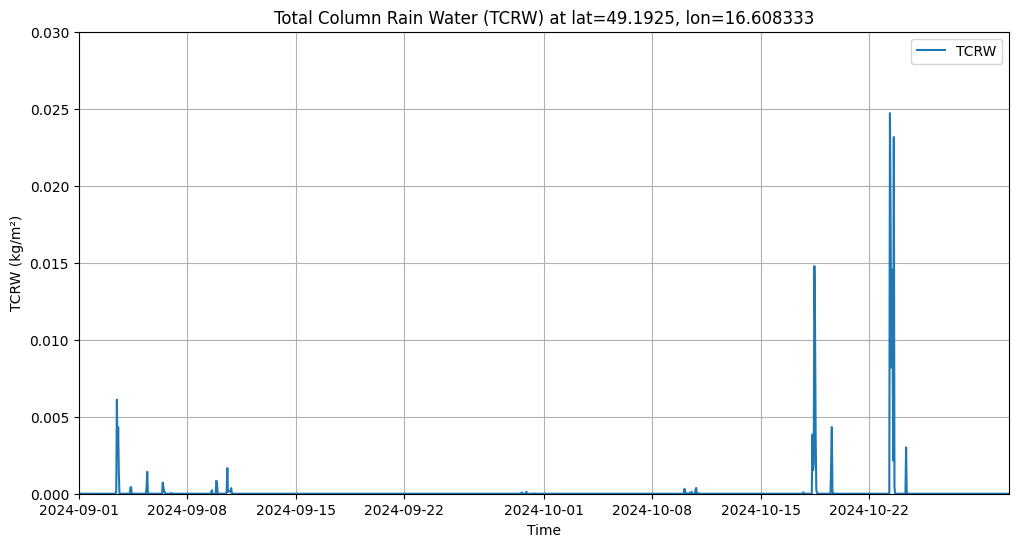

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the time index to a Pandas datetime index
tcrw_timeseries_df = tcrw_timeseries.to_dataframe().reset_index()

# Plot Total Column Rain Water over time with x-axis limited to September - October 2024
plt.figure(figsize=(12, 6))
plt.plot(tcrw_timeseries_df["time"], tcrw_timeseries_df["tcrw"], label="TCRW")

# Set x-axis limits to September - October 2024
plt.xlim(pd.to_datetime("2024-09-01"), pd.to_datetime("2024-10-31"))
plt.ylim([0,0.03])
plt.title(f"Total Column Rain Water (TCRW) at lat={lat}, lon={lon}")
plt.xlabel("Time")
plt.ylabel("TCRW (kg/m²)")
plt.legend()
plt.grid()
plt.show()


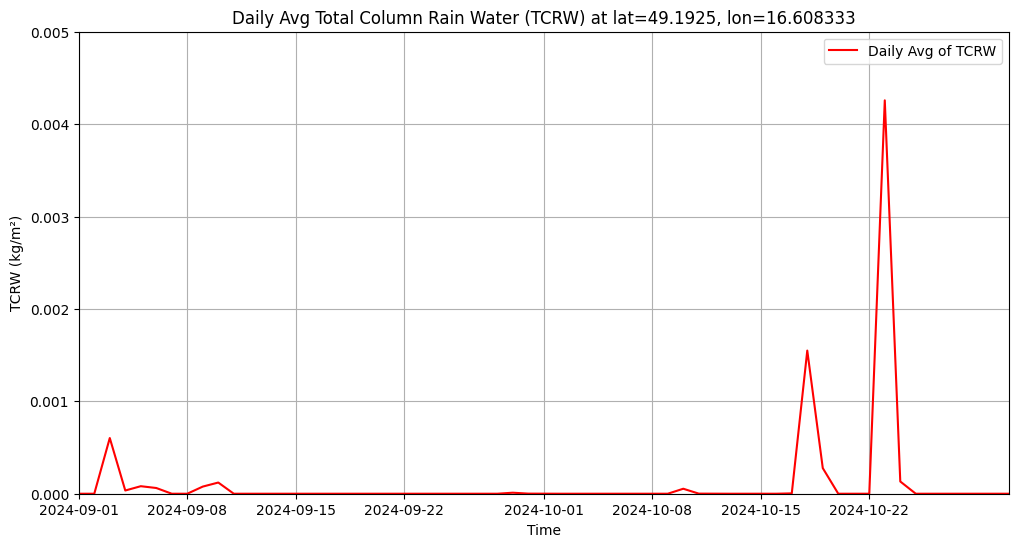

In [10]:
# Resample to daily average TCRW
tcrw_daily = tcrw_timeseries_df.resample("1D", on="time").mean()

# Plot daily average TCRW
plt.figure(figsize=(12, 6))
plt.plot(tcrw_daily.index, tcrw_daily["tcrw"], label="Daily Avg of TCRW", color="red")

# Set x-axis limits
plt.xlim(pd.to_datetime("2024-09-01"), pd.to_datetime("2024-10-31"))
plt.ylim([0, 0.03])  # Adjust limits based on expected values

plt.title(f"Daily Avg Total Column Rain Water (TCRW) at lat={lat}, lon={lon}")
plt.xlabel("Time")
plt.ylabel("TCRW (kg/m²)")
plt.ylim([0,0.005])
plt.legend()
plt.grid()
plt.show()


In [11]:
# Resample to daily average TCRW
tcrw_daily = tcrw_timeseries_df.resample("1D", on="time").mean()

# Save the daily average TCRW data to a CSV file
csv_filename = "tcrw_daily_avg_pl.csv"
tcrw_daily.to_csv(csv_filename, index=True)

print(f"Saved daily average TCRW data as '{csv_filename}'")


Saved daily average TCRW data as 'tcrw_daily_avg_pl.csv'


In [12]:
import pandas as pd

def remove_columns_from_csv(input_file, output_file, columns_to_remove):
    # Load the CSV file
    df = pd.read_csv(input_file)

    # Drop specified columns
    df.drop(columns=columns_to_remove, inplace=True, errors='ignore')
    df.info()
    # Save the modified DataFrame to a new CSV file
    df.to_csv(output_file, index=False)

# Example usage
input_csv = "tcrw_daily_avg_pl.csv"  # Replace with your input file
output_csv = "tcrw_daily_avg_pl.csv"  # Replace with your output file
columns_to_remove = ["number", "step","surface"]  # Replace with column names to remove

remove_columns_from_csv(input_csv, output_csv, columns_to_remove)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        366 non-null    object 
 1   latitude    366 non-null    float64
 2   longitude   366 non-null    float64
 3   valid_time  366 non-null    object 
 4   tcrw        366 non-null    float64
dtypes: float64(3), object(2)
memory usage: 14.4+ KB


In [13]:
import pandas as pd

# Define file paths (replace with actual file names)
file1 = "flood_clusters_brno_zoom.csv"  # Replace with actual file path
file2 = "flood_clusters_otmuchow.csv"  # Replace with actual file path

# Load CSV files into Pandas DataFrames
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Add a column to identify the source file
df1["country"] = "cz"  # Replace "File1" with actual country name if known
df2["country"] = "pl"  # Replace "File2" with actual country name if known

# Combine the two DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Save the combined dataset to a new CSV file
combined_df.to_csv("combined_clusters.csv", index=False)

# Print confirmation
print("Combined CSV file saved as 'combined_tcrw.csv'")


Combined CSV file saved as 'combined_tcrw.csv'


In [35]:
import xarray as xr
import matplotlib.pyplot as plt

lat, lon =50.4575, 17.280833	


 # Example coordinates

# Extract time series at the nearest location
tptimeseries = ds1["tp"].sel(latitude=lat, longitude=lon, method="nearest")


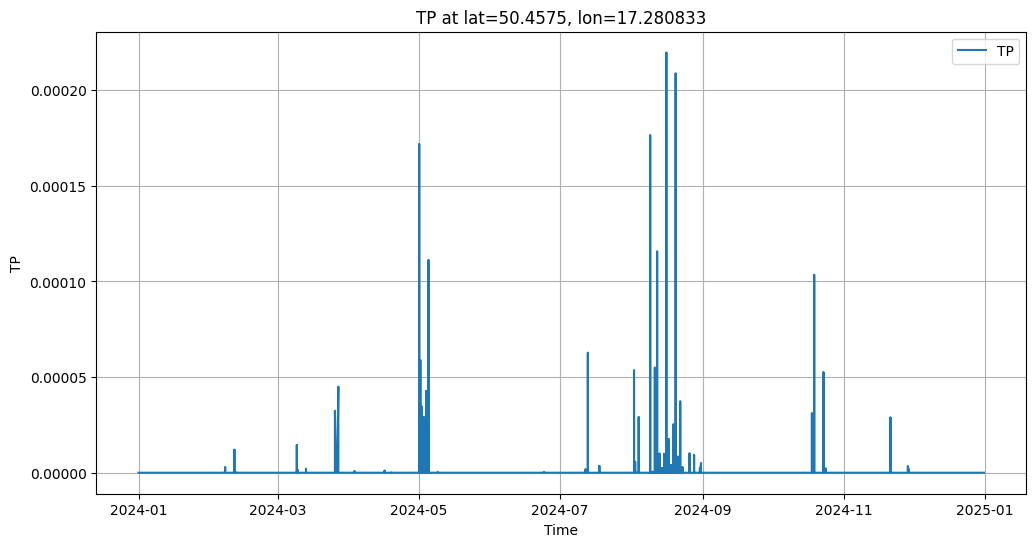

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the time index to a Pandas datetime index
tptimeseries_df = tptimeseries.to_dataframe().reset_index()

# Plot Total Column Rain Water over time with x-axis limited to September - October 2024
plt.figure(figsize=(12, 6))
plt.plot(tptimeseries_df["time"], tptimeseries_df["tp"], label="TP")

# Set x-axis limits to September - October 2024
# plt.xlim(pd.to_datetime("2024-09-01"), pd.to_datetime("2024-10-31"))
# plt.ylim([0,0.03])
plt.title(f"TP at lat={lat}, lon={lon}")
plt.xlabel("Time")
plt.ylabel("TP")
plt.legend()
plt.grid()
plt.show()


In [48]:
tptimeseries_df["tp"] = pd.to_numeric(df["tp"], errors="coerce").fillna(0)  # Fill NaN with 0


,time,step,number,surface,latitude,longitude,valid_time,tp
0,2023-12-31 18:00:00,0 days 01:00:00,0,0.0,17.908,49.973,2023-12-31 19:00:00,NaN
1,2023-12-31 18:00:00,0 days 02:00:00,0,0.0,17.908,49.973,2023-12-31 20:00:00,NaN
2,2023-12-31 18:00:00,0 days 03:00:00,0,0.0,17.908,49.973,2023-12-31 21:00:00,NaN
3,2023-12-31 18:00:00,0 days 04:00:00,0,0.0,17.908,49.973,2023-12-31 22:00:00,NaN
4,2023-12-31 18:00:00,0 days 05:00:00,0,0.0,17.908,49.973,2023-12-31 23:00:00,NaN
...,...,...,...,...,...,...,...,...
8791,2024-12-31 18:00:00,0 days 08:00:00,0,0.0,17.908,49.973,2025-01-01 02:00:00,NaN
8792,2024-12-31 18:00:00,0 days 09:00:00,0,0.0,17.908,49.973,2025-01-01 03:00:00,NaN
8793,2024-12-31 18:00:00,0 days 10:00:00,0,0.0,17.908,49.973,2025-01-01 04:00:00,NaN
8794,2024-12-31 18:00:00,0 days 11:00:00,0,0.0,17.908,49.973,2025-01-01 05:00:00,NaN


In [38]:
import pandas as pd

data=tptimeseries_df
df = pd.DataFrame(data)

# Convert time column to datetime
df["time"] = pd.to_datetime(df["time"])

# Convert valid_time column to datetime
df["valid_time"] = pd.to_datetime(df["valid_time"])

# Convert tp to numeric (handle NaN values)
df["tp"] = pd.to_numeric(df["tp"], errors="coerce").fillna(0)  # Fill NaN with 0

# Sum tp by day
daily_tp_sum = df.groupby(df["valid_time"].dt.date)["tp"].sum().reset_index()

# Rename columns
daily_tp_sum.columns = ["date", "total_tp"]



In [39]:
daily_tp_sum.head()

,date,total_tp
0,2023-12-31,0.0
1,2024-01-01,0.0
2,2024-01-02,0.0
3,2024-01-03,0.0
4,2024-01-04,0.0


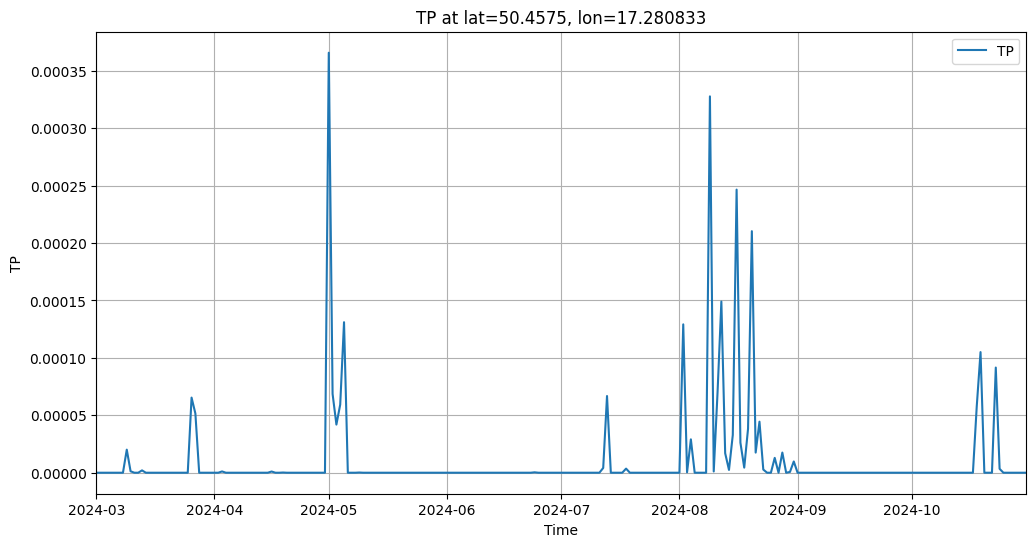

In [40]:
# Plot Total Column Rain Water over time with x-axis limited to September - October 2024
plt.figure(figsize=(12, 6))
plt.plot(daily_tp_sum["date"], daily_tp_sum["total_tp"], label="TP")

# Set x-axis limits to September - October 2024
plt.xlim(pd.to_datetime("2024-03-01"), pd.to_datetime("2024-10-31"))
# plt.ylim([0,0.03])
plt.title(f"TP at lat={lat}, lon={lon}")
plt.xlabel("Time")
plt.ylabel("TP")
plt.legend()
plt.grid()
plt.show()


In [43]:
# daily_tp_sum["country"] = "PL"
# Save the daily average TCRW data to a CSV file
csv_filename = "tp_pl.csv"
daily_tp_sum.to_csv(csv_filename, index=True)